In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data & ubah convert ke datetime
df = pd.read_csv("SBAnational.csv", parse_dates=['ApprovalDate', 'DisbursementDate'])
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,...,N,Y,NaN,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,...,N,Y,NaN,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,...,N,N,NaN,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,...,N,Y,NaN,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,...,N,N,NaN,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


# 1. Descriptive Statistics

In [3]:
pd.set_option('display.max_columns',100)
df.sample(5)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
97922,1726015009,Orient International LLC,EDEN PRAIRIE,MN,55347,U.S. BANK NATIONAL ASSOCIATION,OH,423510,2006-03-22,2006,84,1,2.0,0,1,0,1,Y,N,NaN,2006-04-30,"$60,724.00",$0.00,P I F,$0.00,"$20,000.00","$10,000.00"
835163,8959953009,"QUINN & FEINER SERVICE CO,INC",GLEN COVE,NY,11542,PEOPLE'S UNITED BANK,NY,235110,1996-01-25,1996,60,40,1.0,0,0,1,0,N,N,NaN,1996-04-30,"$350,000.00",$0.00,P I F,$0.00,"$350,000.00","$262,500.00"
346462,3414164001,"METROPLEX METROLOGY LAB, INC.",FORT WORTH,TX,76118,GE CAP. SMALL BUS. FINAN CORP,TX,0,1999-11-26,2000,84,22,1.0,0,0,1,1,N,N,NaN,2000-03-31,"$400,000.00",$0.00,P I F,$0.00,"$400,000.00","$300,000.00"
547413,5369974007,FRANK SPECIALTY DISPLAY MANUFA,BROOKLYN (BOROUGH OF NEW YORK),NY,11207,BANK OF AMERICA NATL ASSOC,RI,421510,2002-04-30,2002,48,40,1.0,10,50,1,1,Y,N,NaN,2002-10-31,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$22,500.00"
295590,3045516006,H.A.Q. HOSPITALITY GROUP LLC,ST. CLOUD,MN,56304,SPEDCO,MN,721110,2007-10-30,2008,240,11,1.0,3,11,1,2,0,N,NaN,2008-08-13,"$769,000.00",$0.00,P I F,$0.00,"$769,000.00","$769,000.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   LoanNr_ChkDgt      899164 non-null  int64         
 1   Name               899150 non-null  object        
 2   City               899134 non-null  object        
 3   State              899150 non-null  object        
 4   Zip                899164 non-null  int64         
 5   Bank               897605 non-null  object        
 6   BankState          897598 non-null  object        
 7   NAICS              899164 non-null  int64         
 8   ApprovalDate       899164 non-null  datetime64[ns]
 9   ApprovalFY         899164 non-null  object        
 10  Term               899164 non-null  int64         
 11  NoEmp              899164 non-null  int64         
 12  NewExist           899028 non-null  float64       
 13  CreateJob          899164 non-null  int64   

#### A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

- **Terdapat banyak column yang harus diubah type datanya antara lain** :
1. NAICS <br>
   Perubahan type data yang awalnya **int** menjadi **object**
2. ApprovalDate <br>
   Perubahan type data yang awalnya **object** menjadi **datetime**
3. ApprovalFY <br>
   Perubahan type data yang awalnya **object** menjadi **int**
4. ChgOffPrinGr <br>
   Perubahan type data yang awalnya **object** menjadi **int**
5. DisbursementDate <br>
   Perubahan type data yang awalnya **object** menjadi **datetime**
6. DisbursementGross <br>
   Perubahan type data yang awalnya **object** menjadi **int**
7. BalanceGross<br>
   Perubahan type data yang awalnya **object** menjadi **int**
8. GrAppv <br>
   Perubahan type data yang awalnya **object** menjadi **int**
9. SBA_Appv <br>
   Perubahan type data yang awalnya **object** menjadi **int**

Sehingga total kolom yang dilakukan perubahan type adalah sebanyak 9 kolom

- **Isi kolom yang tidak sesuai**

**1. Kolom "ApprovalFY"**

In [5]:
#Ubah ApprovalFY ke Interger
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, '2004', '1994', '1979', '1976', '1967', '1975', '1974',
       '1977', '1981', '1982', '1983', '1984', '1978', '1980', '1968',
       '1976A', '1969', '1995', '1970', '2005', '1996', '1971', 1996,
       1971], dtype=object)

**Keterangan** : <br>
Untuk value data di kolom ApprovalFY terdapat kesalahan yaitu:

- Value tidak semua bertipe int ada beberapa data yang bertype string <br>
  hal ini ditandai oleh adanya input (1976A, ' '), sehingga perlu di convert ke bentuk integer <br>
- Kolom ApprovalFY dan ApprovalDate terdapat kesalahan input tahun yang tidak sama. sehingga untuk tahap selanjutnya akan   dilakukan pada stage 3 "Preprocessing" 

**2. Kolom ("DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv")**

In [6]:
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


**Keterangan** : <br>
Value dari kolom diatas masih berbentuk type "object", hal ini ditandai dengan adanya value yang mengandung tanda($) dan (,). Sehingga, untuk tahap selanjutnya akan dilakukan perubahan type value tersebut sesuai dengan type yang benar.

In [7]:
def remove_sign(item):
        new = item.replace('$','')
        new2 = new.replace(' ','')
        new3 = new2.replace(',','')
        return float(new3)

df['DisbursementGross'] = df['DisbursementGross'].apply(lambda x : remove_sign(x))
df['BalanceGross'] = df['BalanceGross'].apply(lambda x : remove_sign(x))
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(lambda x : remove_sign(x))
df['GrAppv'] = df['GrAppv'].apply(lambda x : remove_sign(x))
df['SBA_Appv'] = df['SBA_Appv'].apply(lambda x : remove_sign(x))

In [8]:
df[["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,60000.0,0.0,0.0,60000.0,48000.0
1,40000.0,0.0,0.0,40000.0,32000.0
2,287000.0,0.0,0.0,287000.0,215250.0
3,35000.0,0.0,0.0,35000.0,28000.0
4,229000.0,0.0,0.0,229000.0,229000.0
...,...,...,...,...,...
899159,70000.0,0.0,0.0,70000.0,56000.0
899160,85000.0,0.0,0.0,85000.0,42500.0
899161,300000.0,0.0,0.0,300000.0,225000.0
899162,75000.0,0.0,46383.0,75000.0,60000.0


**Keterangan** : <br>
Value pada kolom telah diubah ke bentuk yang benar, karena sudah berbentuk int tidak lagi dalam bentuk object.

**3. Kolom NAICS** :

In [9]:
df['NAICS'].value_counts()

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
927110         1
327410         1
314992         1
922110         1
325192         1
Name: NAICS, Length: 1312, dtype: int64

**Keterangan** : <br>
Terdapat values yang kurang sesuai yaitu nilai "0". Sehingga, untuk tahap selanjutnya yaitu preprocessing kami hanya akan mengambil values 2 digit dari depan. Artinya, kami hanya mengambil digit berdasarkan sektor industri.

> sumber : https://www.naics.com/search/

**4. Kolom NewExist** :

In [10]:
df['NewExist'].value_counts().reset_index()

,index,NewExist
0,1.0,644869
1,2.0,253125
2,0.0,1034


**Keterangan** : <br>
Pada kolom NewExist terdapat nilai yang tidak sesuai atau tidak terdefinisi yaitu "0.0". Hal, ini dikarenakan untuk kasus ini kami membuat 2 variabel dummy yaitu "1.0" yang akan dilakukan perubahan menjadi "0" (jika bisnis berusia <= 2 tahun) dan value "2.0" akan dilakukan perubahan menjadi "1" (jika bisnis berusia > 2 tahun).<br>
Sehingga untuk tahap selanjutnya pada value "0.0" kami akan hilangkan


Perubahan ini berdasarkan paper yang menjadi acuan pada final project yang dilakukan.
https://www.kaggle.com/datasets/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**5. Kolom UrbanRural**

In [11]:
df['UrbanRural'].value_counts().reset_index()

,index,UrbanRural
0,1,470654
1,0,323167
2,2,105343


**Keterangan** : <br>
Pada kolom UrbanRural terdapat value yang tidak terdefinisi yaitu "0", karena value "1" mewakili Perkotaan dan value "2" mewakili pedesaan.
Sehingga untuk tahap selanjutnya kami akan menghilangkan value "0"

**6. Kolom LowDoc** 

In [12]:
df['LowDoc'].value_counts().reset_index()

,index,LowDoc
0,N,782822
1,Y,110335
2,0,1491
3,C,758
4,S,603
5,A,497
6,R,75
7,1,1


**Keterangan** : <br>
Pada kolom LowDoc terdapat value yang tidak terdefinisi yaitu **0, C, S, A, R, 1**. Karena pada kolom LowDoc hanya memiliki 2 value yaitu **Y = Ya** dan **N = No**. <br>
Sehingga untuk tahap selanjutnya kami akan melakukan penghapusan value **0, C, S, A, R, 1**.

**7. Kolom NoEmp**

In [13]:
df["NoEmp"].max()

9999

**Keterangan** : <br>
Disini kolom "NoEmp" menyatakan jumlah karyawan, berdasarkan sumber terkait harusnya yang termasuk "Small Business" memiliki jumlah max karyawan antara 250 - 1500. tetapi dikolom tersebut ada data yang melebihi nilai 1500. Artinya pada data kolom NoEmp terdapat outliner, sehingga untuk tahap kedepanya akan dilakukan penghapusan data yang outliners tersebut.

References : https://www.sba.gov/sites/default/files/files/Size_Standards_Table.pdf and https://www.sba7a.loans/sba-7a-loans-small-business-blog/small-business-definition

**8. Kolom Term**

In [14]:
df[["Term"]].describe()

,Term
count,899164.000000
mean,110.773078
std,78.857305
min,0.000000
25%,60.000000
50%,84.000000
75%,120.000000
max,569.000000


**Keterangan** : <br>
Kolom "Term" menyatakan jumlah jangka waktu pembayaran, akan tetapi kami menemukan value "0" pada kolom term yang dimana itu adalah nilai minimal untuk kolom Term. temuan ini juga mengindikasikan bahwa terdapat outliners pada data tersebut karena memiliki gap yang sangat jauh dengan nilai mean maupun maksimalnya. Oleh karena itu, untuk penanganan selanjutnya, kami akan melakukan penghapusan data outliners tersebut.

**9. Kolom FranchiseCode**

In [15]:
df["FranchiseCode"].unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930], dtype=int64)

**Keterangan** : <br>
Berdasarkan informasi dari dataset yang digunakan bahwa kolom FranchiseCode memiliki (00000 atau 00001) = no FranchiseCode. Sehingga, untuk tahap selanjutnya yaitu pada saat preprocessing memutuskan untuk memisahkan Franchise menjadi:
- FranchiseCode = 1 (memiliki FranchiseCode)
- FranchiseCode = 0 (tanpa FranchiseCode) 

#### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [16]:
df.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

**Keterangan** : <br>
Pada dataset SBAnational terdapat beberapa kolom yang mengandung nilai kosong, adapun kolom tersebut:
1. name
2. City
3. State
4. Bank
5. BankState
6. NewExist
7. RevLineCr
8. LowDoc
9. ChgOffDate
10. DisbursementDate 
11. MIS_Status

Sehingga, total kolom yang mengandung nilai kosong adalah sebanyak 11 kolom.
Untuk penangan kolom yang mengandung nilai kosong kami akan melakukan ....

#### C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq) 

In [17]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,1997,84,4,2.0,0,0,1,0,N,Y,NaN,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,1997,60,2,2.0,0,0,1,0,N,Y,NaN,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,1997,180,7,1.0,0,0,1,0,N,N,NaN,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,1997-02-28,1997,60,2,1.0,0,0,1,0,N,Y,NaN,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,1997-02-28,1997,240,14,1.0,7,7,1,0,N,N,NaN,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0


In [18]:
# pengelompokan kolom berdasarkan jenisnya

cats = ['Name', 'City', 'Bank', 'BankState', 'State', 'RevLineCr', 'LowDoc', 'MIS_Status']
nums = ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv']
timestamp = ['ApprovalDate', 'ChgOffDate', 'DisbursementDate', 'ApprovalFY']

In [19]:
df[nums].describe()

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
count,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,8.991640e+05,899164.000000,8.991640e+05,8.991640e+05,8.991640e+05
mean,110.773078,11.411353,1.280404,8.430376,10.797257,0.757748,2.011540e+05,2.989349,1.350330e+04,1.926870e+05,1.494888e+05
std,78.857305,74.108196,0.451750,236.688165,237.120600,0.646436,2.876408e+05,1442.161912,6.515229e+04,2.832634e+05,2.284146e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2.000000e+02,1.000000e+02
25%,60.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.200000e+04,0.000000,0.000000e+00,3.500000e+04,2.125000e+04
50%,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000e+05,0.000000,0.000000e+00,9.000000e+04,6.125000e+04
75%,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,2.380000e+05,0.000000,0.000000e+00,2.250000e+05,1.750000e+05
max,569.000000,9999.000000,2.000000,8800.000000,9500.000000,2.000000,1.144632e+07,996262.000000,3.512596e+06,5.472000e+06,5.472000e+06


**Keterangan** :
- Pada kolom **Term, NoEmp, NewExist & UrbanRural** harusnya tidak terdapat nilai "0"
- Pada kolom **Term, NoEmp, CreateJob, RetainedJob, DisbursementGross, BalanceGross**, memiliki nilai mean > median. Hal ini bisa menandakan bahwa Skewness Positive
- pada kolom **GrAppv, SBA_Appv**, memiliki nilai median > mean. Hal ini bisa menandakan bahwa Skewness negatif 

In [20]:
df[cats].describe()

,Name,City,Bank,BankState,State,RevLineCr,LowDoc,MIS_Status
count,899150,899134,897605,897598,899150,894636,896582,897167
unique,779583,32581,5802,56,51,18,8,2
top,SUBWAY,LOS ANGELES,BANK OF AMERICA NATL ASSOC,CA,CA,N,N,P I F
freq,1269,11558,86853,118116,130619,420288,782822,739609


**Keterangan** : <br>
Pada kolom "RevLineCr" & "LowDoc" seharusnya hanya terdapat 2 nilai unique "Y" & "N"

In [21]:
#Cek Value unique Setiap Column category
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Name:
SUBWAY                            1269
QUIZNO'S SUBS                      433
COLD STONE CREAMERY                366
QUIZNO'S                           345
DOMINO'S PIZZA                     329
                                  ... 
Mohammad N. Hassan (epc) for C       1
N.J. Yellow Tale Flower              1
CEF INC.                             1
SCANNELL AND ASSOCIATES LP           1
PACIFIC TRADEWINDS FAN & LIGHT       1
Name: Name, Length: 779583, dtype: int64

Value count kolom City:
LOS ANGELES                       11558
HOUSTON                           10247
NEW YORK                           7846
CHICAGO                            6036
MIAMI                              5594
                                  ...  
EL DORADO SPRINGS (ELDORADO SP        1
HUNTINDON                             1
LEBAHON                               1
WILLOW RIVER                          1
SO. OZONE PARK                        1
Name: City, Length: 32581, dtype: int64



# Preprocessing and Features Engineering

In [23]:
# Change ApprovalFY to year (int)

def change_year(x):
    if x['ApprovalFY'] == '1976A':
        return 1976
    else:
        return int(x['ApprovalFY'])
    
df['ApprovalFY'] = df.apply(change_year,axis=1)

In [24]:
# After
df['ApprovalFY'].unique()

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1962, 1982, 1965, 1966, 1983, 1973, 1984, 2007,
       1985, 1986, 1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010,
       1967, 2011, 1992, 1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977,
       1976, 1968, 1969, 1995, 1970, 1996, 1971], dtype=int64)

In [25]:
# Change naics code to 2 digit

temp = []
for item in df['NAICS']:
    if item == 0 :
        temp.append(0)
    else :
        a = list(str(item))[:2]
        b = ''.join(a)
        temp.append(b)

df['NAICS'] = temp

# Drop NAICS = 0
index_naics = []
for item in list(df[df['NAICS'] == 0].index):
    index_naics.append(item)

df.drop(index_naics,inplace=True)

In [26]:
df['NAICS'] = df['NAICS'].map({
    '11': 'Agriculture / Forestry / Fishing / Hunting',
    '21': 'Mining / Quarrying / Oil&Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation / Warehousing',
    '49': 'Transportation / Warehousing',
    '51': 'Information',
    '52': 'Finance / Insurance',
    '53': 'Real Estate / Rental / Leasing',
    '54': 'Proffesional / Scientific / Tech.Service',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative & Support / Waste Management / Remediation Services',
    '61': 'Educational',
    '62': 'Health Care / Social Assistance',
    '71': 'Arts / Entertainment / Recreation',
    '72': 'Accomodation / Food Services',
    '81': 'Other Services (except public admin)',
    '92': 'Public Administration'
})

In [30]:
# Drop NewExist = 0
index_exist0 = []
for item in list(df[df['NewExist'] == 0].index):
    index_exist0.append(item)

df.drop(index_exist0,inplace=True)

In [31]:
# change franchise

def change_franchise(x):
    if (x == 1) | (x == 0):
        return 0
    else :
        return 1

df['FranchiseCode'] = df['FranchiseCode'].apply(lambda x: change_franchise(x))

In [33]:
# Drop LowDoc = 0
index_drop_lowdoc = []
for index in list(df[(df['LowDoc'] != 'N') & (df['LowDoc'] != 'Y')].index):
    index_drop_lowdoc.append(index)

df.drop(index_drop_lowdoc,inplace=True)

In [35]:
# Drop UrbanRural = 0
index_urbanrural = []
for item in list(df[df['UrbanRural'] == 0].index):
    index_urbanrural.append(item)

df.drop(index_urbanrural,inplace=True)

In [48]:
# Drop NoEmp = 0 & NoEmp > 1500
df = df[df['NoEmp'] != 0] 
df = df[df['NoEmp'] <= 1500]

In [51]:
# Drop Term = 0
df = df[df['Term'] != 0]

In [52]:
# Missing value pada column MIS_Status
df['MIS_Status'] = np.where(df['ChgOffPrinGr'] == 0, 'P I F', 'CHGOFF')

In [53]:
# Membuat variabel/column resesi (desember 2007 sampai juni 2009) diambil dari tanggal persetujuan/komitmen

df['Recession'] = 0
df.loc[((df['ApprovalDate'].dt.year == 2007) & (df['ApprovalDate'].dt.month >= 12)) | ((df['ApprovalDate'].dt.year == 2008) & (df['ApprovalDate'].dt.month <= 12)) | ((df['ApprovalDate'].dt.year == 2009) & (df['ApprovalDate'].dt.month <= 6)), 'Recession'] = 1

In [54]:
#Cek kolom resesi apakah sudah sesuai tanggal
resesi = df[['ApprovalDate', 'Recession']]
resesi[resesi['ApprovalDate'].dt.year == 2009].sample(20)

,ApprovalDate,Recession
336806,2009-03-24,1
331317,2009-01-27,1
368513,2009-08-14,0
365544,2009-08-03,0
340103,2009-04-09,1
330297,2009-01-08,1
377302,2009-09-22,0
397373,2009-12-24,0
383702,2009-10-16,0
386341,2009-10-29,0


In [55]:
df1 = df.groupby(['Recession', 'MIS_Status']).agg(Jumlah_Peminjam=('LoanNr_ChkDgt', 'count')).reset_index()
df1

,Recession,MIS_Status,Jumlah_Peminjam
0,0,CHGOFF,118628
1,0,P I F,382682
2,1,CHGOFF,13712
3,1,P I F,26578


In [56]:
df2 =  df.groupby('Recession').agg(Jumlah_Total_Peminjam=('LoanNr_ChkDgt', 'count')).reset_index()
df2

,Recession,Jumlah_Total_Peminjam
0,0,501310
1,1,40290


In [57]:
df_merge = df1.merge(df2, on = 'Recession')
df_merge

,Recession,MIS_Status,Jumlah_Peminjam,Jumlah_Total_Peminjam
0,0,CHGOFF,118628,501310
1,0,P I F,382682,501310
2,1,CHGOFF,13712,40290
3,1,P I F,26578,40290


In [58]:
# Menambah Kolom Rasio
df_merge['Rasio'] = round (df_merge['Jumlah_Peminjam'] / df_merge['Jumlah_Total_Peminjam'] * 100,2)

#ubah nama data
df_merge['Recession'] = df_merge['Recession'].replace({0: 'Lainnya', 1: 'Resesi'})

df_merge

,Recession,MIS_Status,Jumlah_Peminjam,Jumlah_Total_Peminjam,Rasio
0,Lainnya,CHGOFF,118628,501310,23.66
1,Lainnya,P I F,382682,501310,76.34
2,Resesi,CHGOFF,13712,40290,34.03
3,Resesi,P I F,26578,40290,65.97


In [59]:
#membuat kolom realestate
df['RealEstate'] = 0
df.loc[df['Term'] >= 240, 'RealEstate'] = 1

In [60]:
#cek kolom apakah sudah sesuai
re = df[['Term', 'RealEstate']]
re.sample(10)

,Term,RealEstate
372788,84,0
200828,84,0
217398,110,0
461078,28,0
707339,81,0
712300,120,0
452627,60,0
872121,84,0
130975,120,0
556268,84,0


In [61]:
#membuat column "portion"
df['Portion'] = df['SBA_Appv'] / df['GrAppv'] * 100

In [62]:
df[['SBA_Appv','GrAppv', 'Portion']]

,SBA_Appv,GrAppv,Portion
12,190050.0,253400.0,75.0
24,116705.0,137300.0,85.0
28,50000.0,100000.0,50.0
30,17500.0,35000.0,50.0
32,42500.0,50000.0,85.0
...,...,...,...
894809,509000.0,509000.0,100.0
894814,5000.0,10000.0,50.0
894832,1038000.0,1038000.0,100.0
896082,127500.0,170000.0,75.0


# 2. Univariate Analysis.

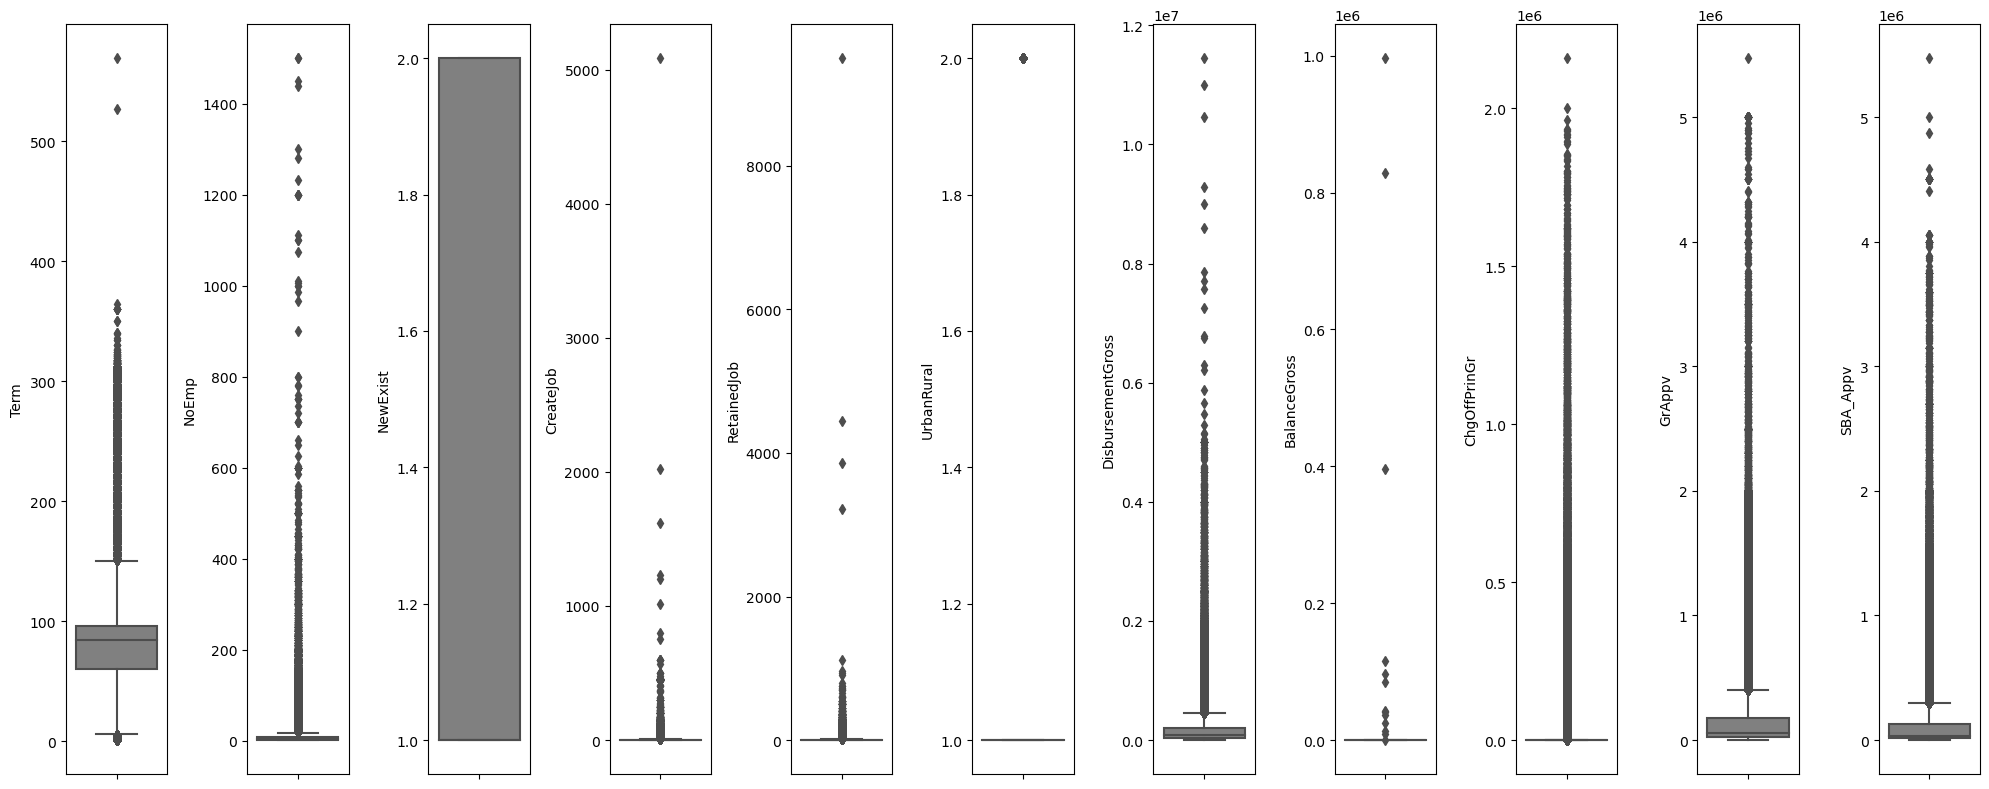

In [63]:
plt.figure(figsize=(20, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

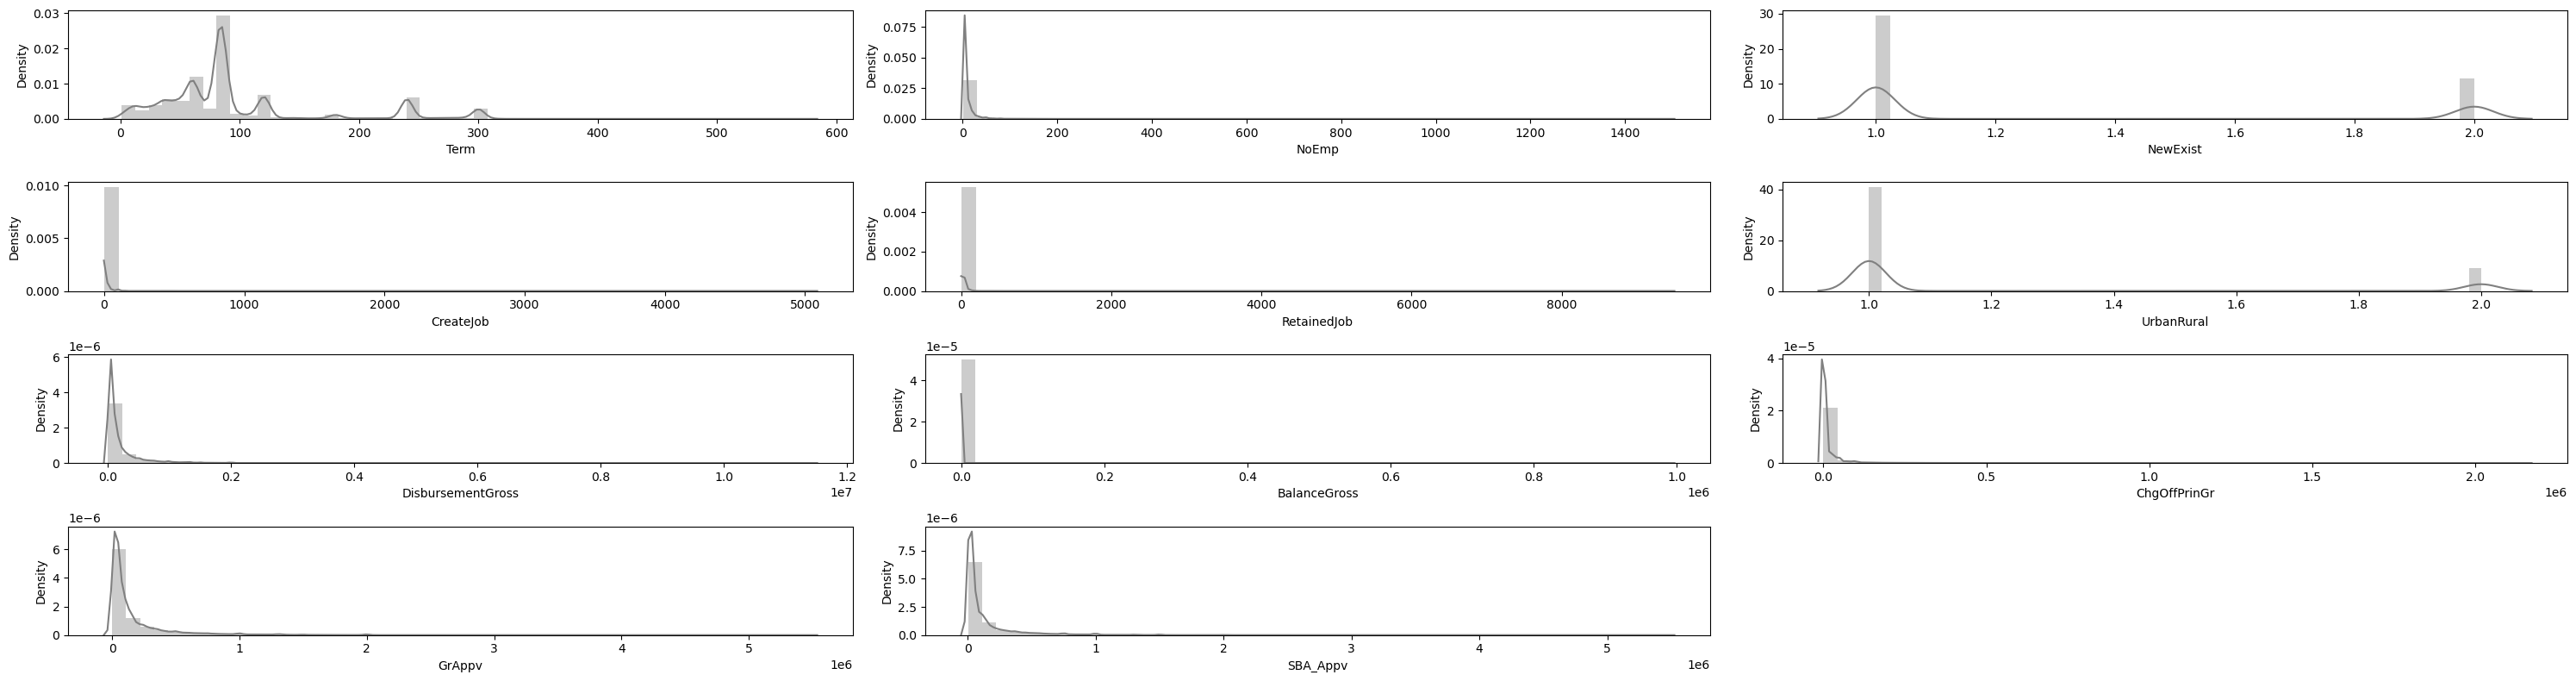

In [64]:
plt.figure(figsize=(30, 8))
for i in range(0, len(nums)):
    plt.subplot(4, 3, i+1)
    sns.distplot(df[nums[i]], color='gray')
    plt.tight_layout()

**Keterangan** : <br>
- Dari informasi diatas bisa kita lihat bahwa banyak peminjam memiliki term < 100. Memiliki distribusi plot multimodal.


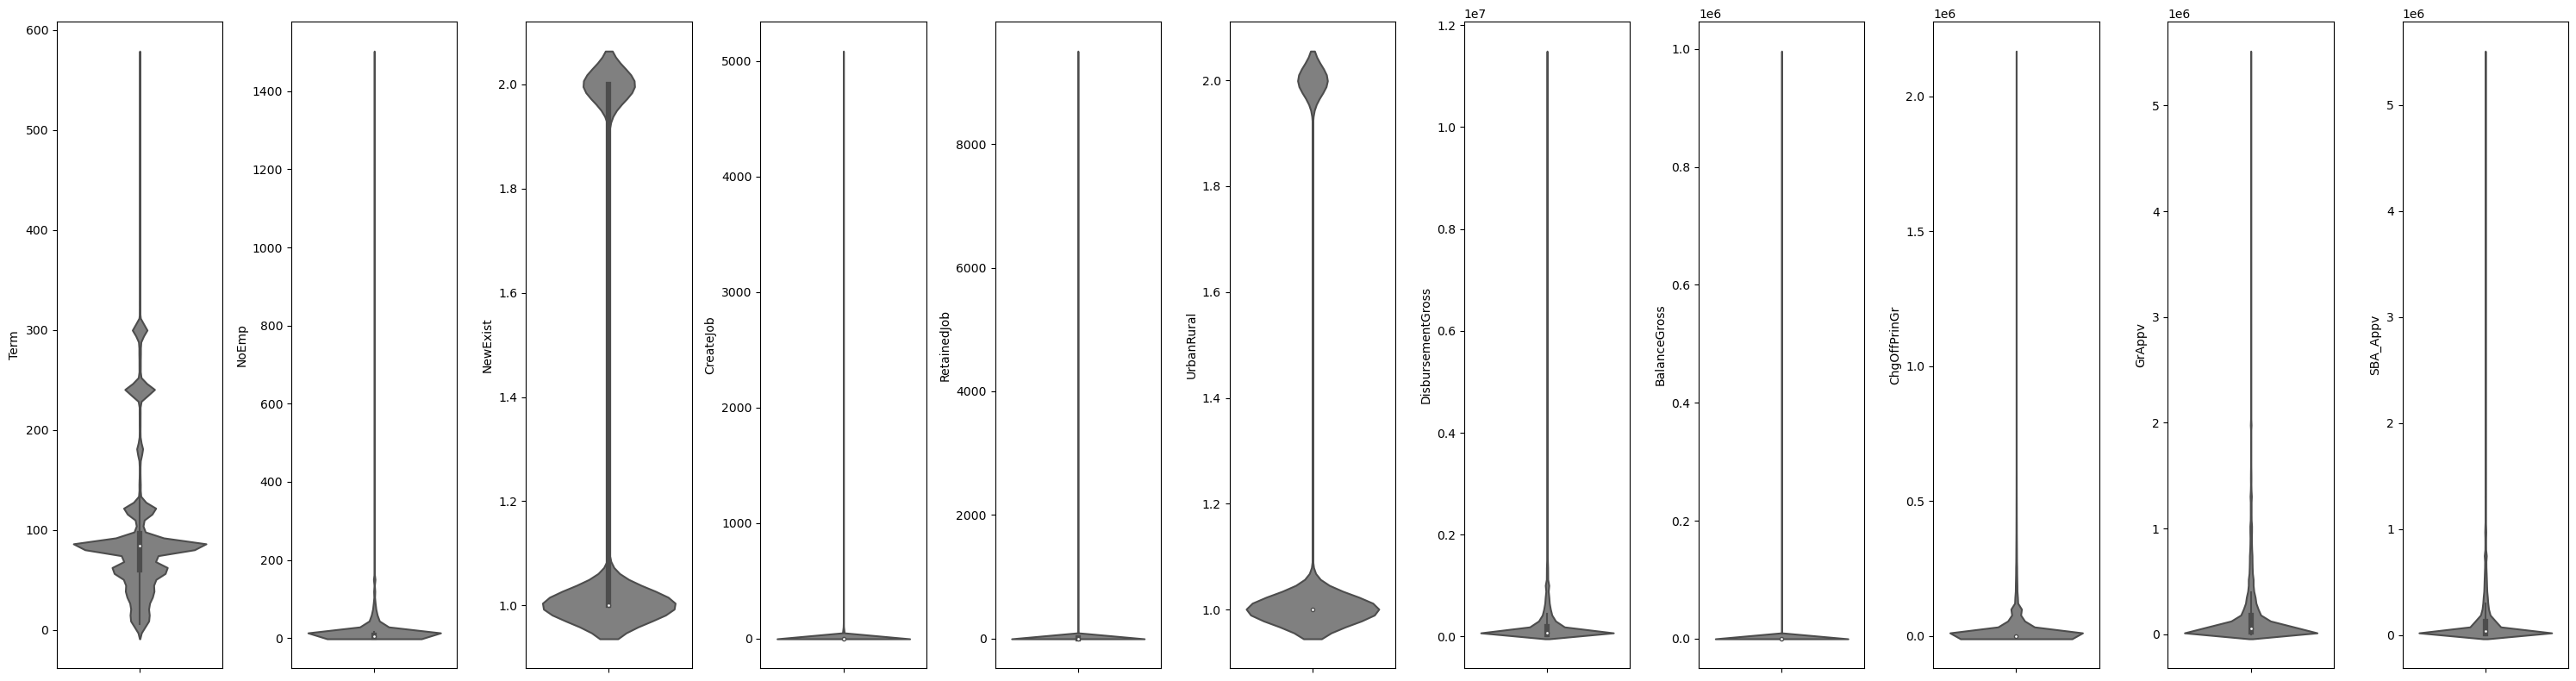

In [65]:
plt.figure(figsize=(30, 8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='gray', orient='v')
    plt.tight_layout()

**Keterangan** : <br>
Berdasarkan visualisasi menggunakan **Violinplot, Displot, Boxplot** didapatkan hasil sebagai berikut: <br>
1. Variabel Term <br>
   Variabel term berdistribusi secara positive skewness dan memiliki outliers ditandai dengan adanya plot titik-titik diatas garis whiskers. Selain itu data yang tidak terlalu menyebar, bisa dilihat bahwa pusat sebaran data berada sekitar term 90 - 120.
   
2. Variabel NoEmp <br>
   Untuk variabel NoEmp terdapat banyak sekali outlier yaitu nilai > 1500, karena untuk kategori "Small Business" hanya memiliki jumlah maksimal karyawan diantara 250 - 1500. kemudian untuk distribusinya juga cenderung positive skewness. 

3. Variabel DisbursementGross* <br>
   Variabel DisbursementGross merupakan positive skewness dan terdapat outlier dengan nilai terekstrime sekitar 1,2. selain itu data tidak menyebar dan hanya berada pada kisaran dibawah 0.1
   
4. Variabel BalanceGross* <br>
   Variabel BalanceGross memiliki data yang nilai outlier 
bahkan nilai terekstrime berkisar diangka 1.0 dan juga distribusinya juga cenderung positive skewness. Serta penyebaran data ber ada dibawah 0.0

5. Variabel GrAppv* <br>
   Variabel BalanceGross memiliki data yang nilai outlier 
bahkan nilai terekstrime berkisar diangka 6 dan juga distribusinya juga cenderung positive skewness. Serta penyebaran data ber ada dibawah 1

6. Variabel SBAAppv* <br>
   Variabel BalanceGross memiliki data yang nilai outlier 
bahkan nilai terekstrime berkisar diangka 6 dan juga distribusinya juga cenderung positive skewness. Serta penyebaran data ber ada dibawah 1


Dari penjelasan diatas bahwa kebanyakan variabel terdistribusi skewness positif yang banyak memiliki outlier. Akan tetapi pada variabel BalanceGross memiliki nilai outlier yang sangat ekstrime jika dibandingkan dengan variabel lainya. Karena variabel lainya nilai outlier jaraknya masih dekat dengan data lainya (outlier lemah). Sedangkan untuk variabel BalanceGross tingkat outlier ekstremenya sangat jauh dari data lainya. Sehingga untuk tahap kedepanya kami akan melakukan ....... pada variabel BalanceGross.

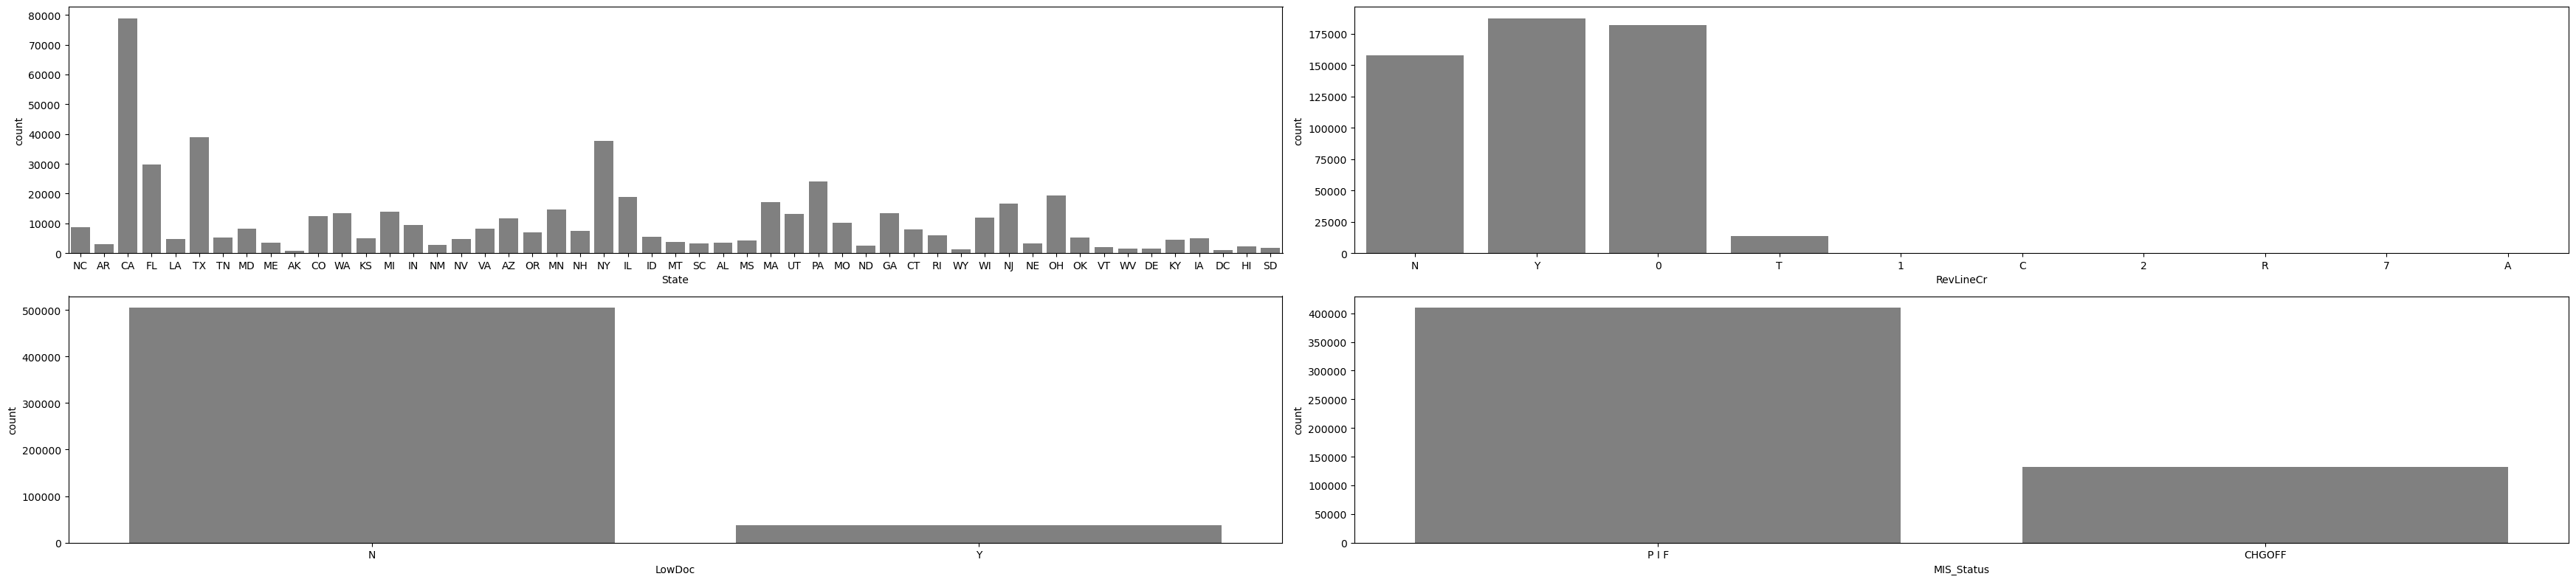

In [66]:
plt.figure(figsize=(35, 8))
for i in range(0, len(cats[4:])):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cats[4:][i]], color='gray', orient='h')
    plt.tight_layout()

**Keterangan** : <br>


cats = ['Name', 'City', 'Bank', 'BankState', 'State', 'RevLineCr', 'LowDoc', 'MIS_Status']

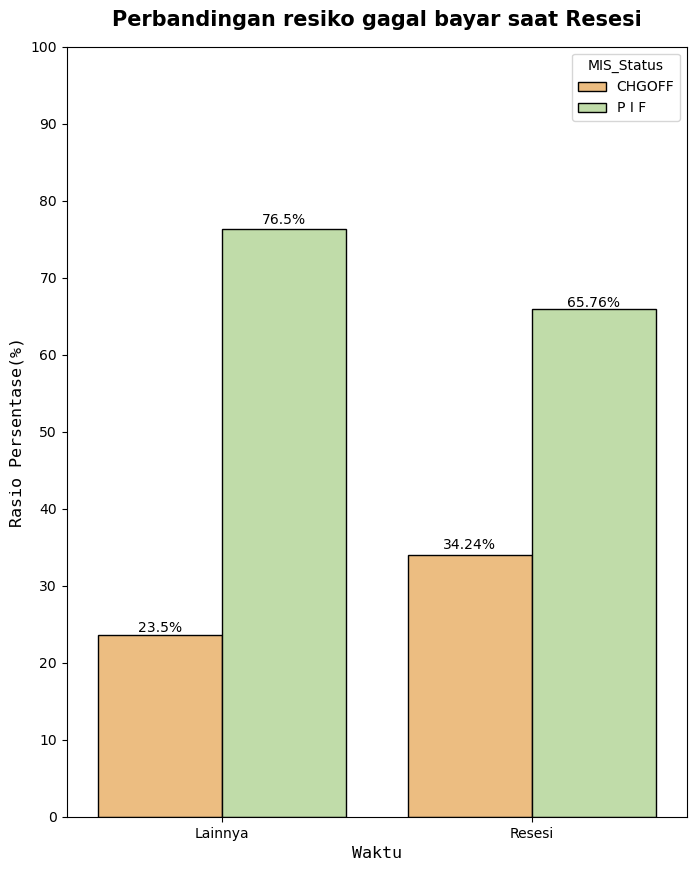

In [76]:
# Membuat plot
plt.figure (figsize = (8, 10))
sns.barplot(x ='Recession', y = 'Rasio', hue = 'MIS_Status', data = df_merge, palette = 'Spectral', lw = 1, ec = 'k')

# Memberi judul pada plot dan sumbu-sumbunya
plt.title('Perbandingan resiko gagal bayar saat Resesi', fontsize=15, fontweight='bold', pad = 15, family='DejaVu Sans')
plt.xlabel('Waktu', fontsize = 12, fontname='monospace')
plt.ylabel('Rasio Persentase(%)', fontsize = 12,fontname='monospace')
plt.text(x=-0.20, y=24.5, s='23.5%', ha='center', va='center', fontsize=10)
plt.text(x=0.20, y=77.5, s='76.5%', ha='center', va='center', fontsize=10)
plt.text(x=0.80, y=35.24, s='34.24%', ha='center', va='center', fontsize=10)
plt.text(x=1.20, y=66.76, s='65.76%', ha='center', va='center', fontsize=10)
plt.yticks(range(0, 110, 10)) 


# Menampilkan plot
plt.show()

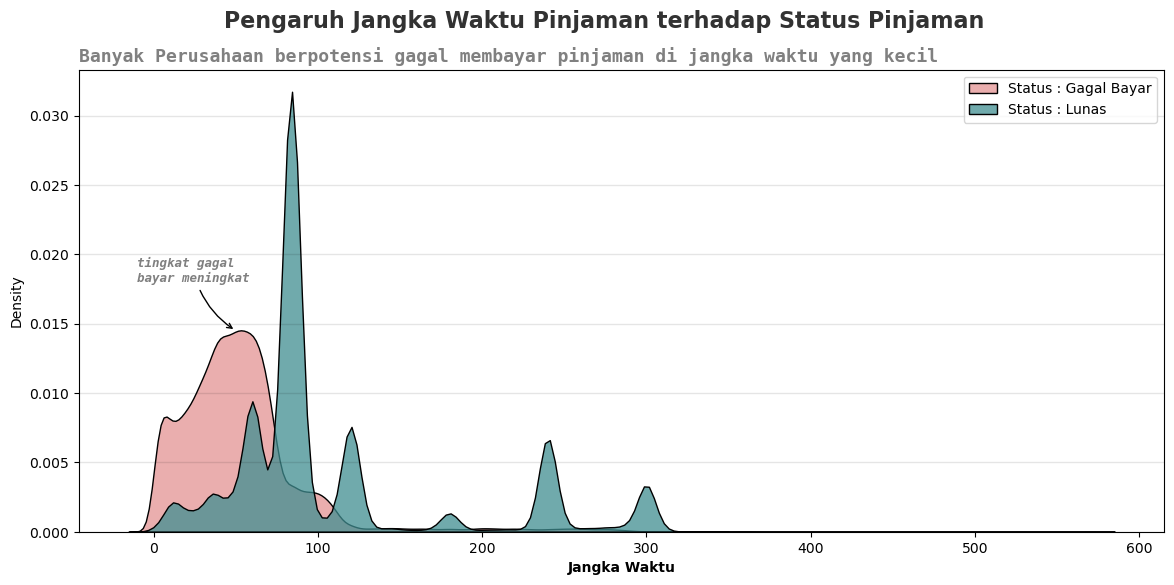

In [79]:
#create column
CHGOFF = df[df['MIS_Status'] == 'CHGOFF']
PIF = df[df['MIS_Status'] == 'P I F']

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

sns.kdeplot(x = 'Term', data = CHGOFF, label = 'Status : Gagal Bayar', 
            color = '#E49393', fill = True, multiple = 'stack', ax = ax)

sns.kdeplot(x = 'Term', data = PIF, label = 'Status : Lunas',
            color = '#408E91', fill = True, multiple = 'stack', ax = ax)

fig.suptitle("Pengaruh Jangka Waktu Pinjaman terhadap Status Pinjaman", fontsize=16, fontweight='bold', family='DejaVu Sans', color='#323232')
plt.title('Banyak Perusahaan berpotensi gagal membayar pinjaman di jangka waktu yang kecil', fontsize=13, fontweight='bold', family='monospace', color='grey', loc ='left')
plt.annotate('tingkat gagal\nbayar meningkat', fontstyle='italic',  fontname='monospace', color ='grey',fontweight='bold', fontsize=9,xy=(50,0.0145),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'),xytext=(-10,0.018))
ax.grid(c = 'black', lw = 1, axis = 'y', alpha = 0.1)
ax.set_xlabel('Jangka Waktu',  weight = 'bold')
ax.legend()

plt.show()

<AxesSubplot:xlabel='ApprovalFY', ylabel='DisbursementGross'>

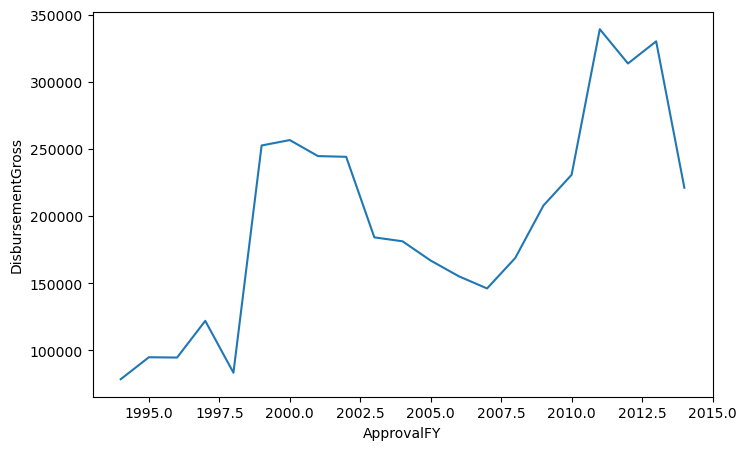

In [80]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df.groupby('ApprovalFY').mean().reset_index()['ApprovalFY'],y=df.groupby('ApprovalFY').mean().reset_index()['DisbursementGross'])

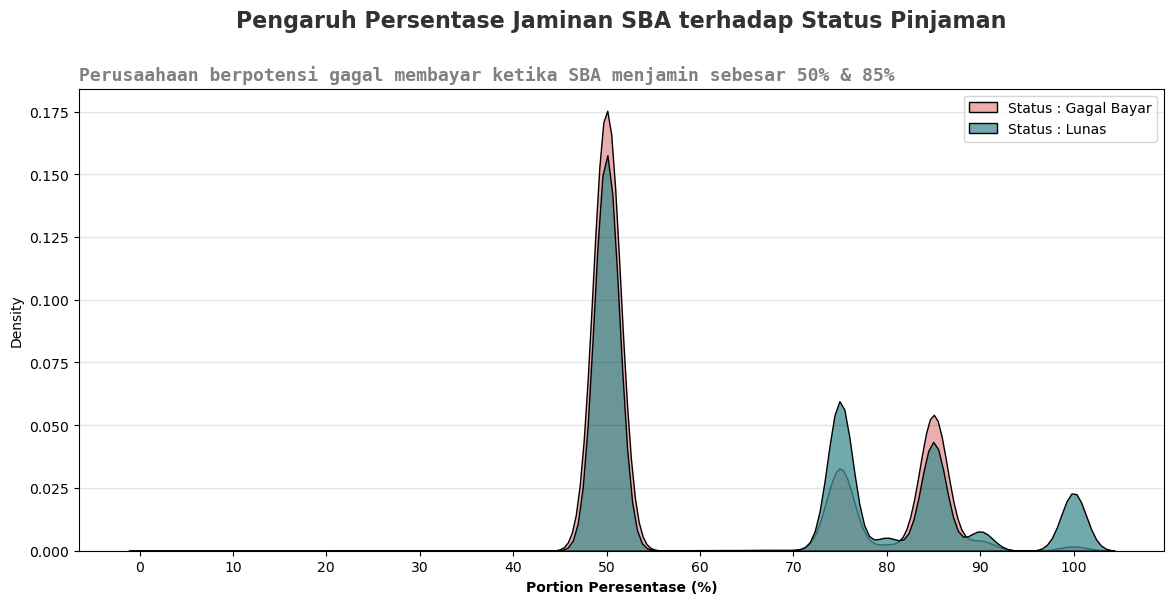

In [83]:
#create column
CHGOFF = df[df['MIS_Status'] == 'CHGOFF']
PIF = df[df['MIS_Status'] == 'P I F']

fig, ax = plt.subplots(1, 1, figsize = (14, 6))

sns.kdeplot(x = 'Portion', data = CHGOFF, label = 'Status : Gagal Bayar', 
            color = '#E49393', fill = True, multiple = 'stack', ax = ax)

sns.kdeplot(x = 'Portion', data = PIF, label = 'Status : Lunas',
            color = '#408E91', fill = True, multiple = 'stack', ax = ax)

plt.title("Pengaruh Persentase Jaminan SBA terhadap Status Pinjaman\n \n", fontsize=16, fontweight='bold', family='sansserif', color='#323232')
plt.title('Perusaahaan berpotensi gagal membayar ketika SBA menjamin sebesar 50% & 85%', fontsize=13, fontweight='bold', family='monospace', color='grey', loc ='left')
#plt.annotate('tingkat gagal\nbayar meningkat', fontstyle='italic',  fontname='monospace', color ='grey',fontweight='bold', fontsize=9,xy=(50,0.0135),arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=.2'),xytext=(-10,0.018))
ax.grid(c = 'black', lw = 1, axis = 'y', alpha = 0.1)
ax.set_xlabel('Portion Peresentase (%)',  weight = 'bold')
ax.legend()
plt.xticks(range(0, 110, 10)) 
plt.show()

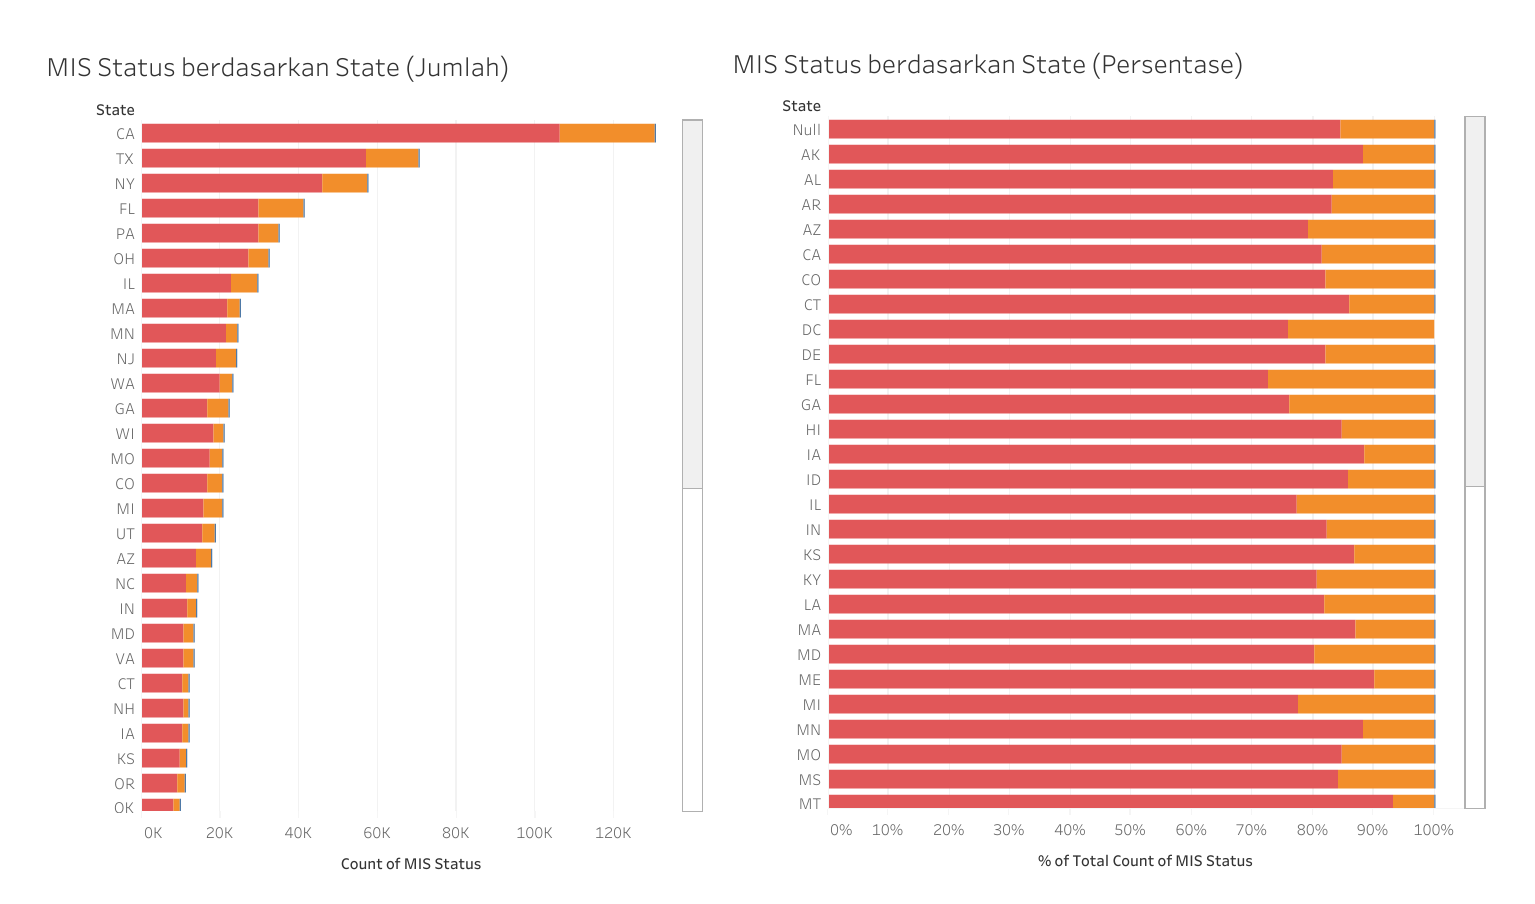

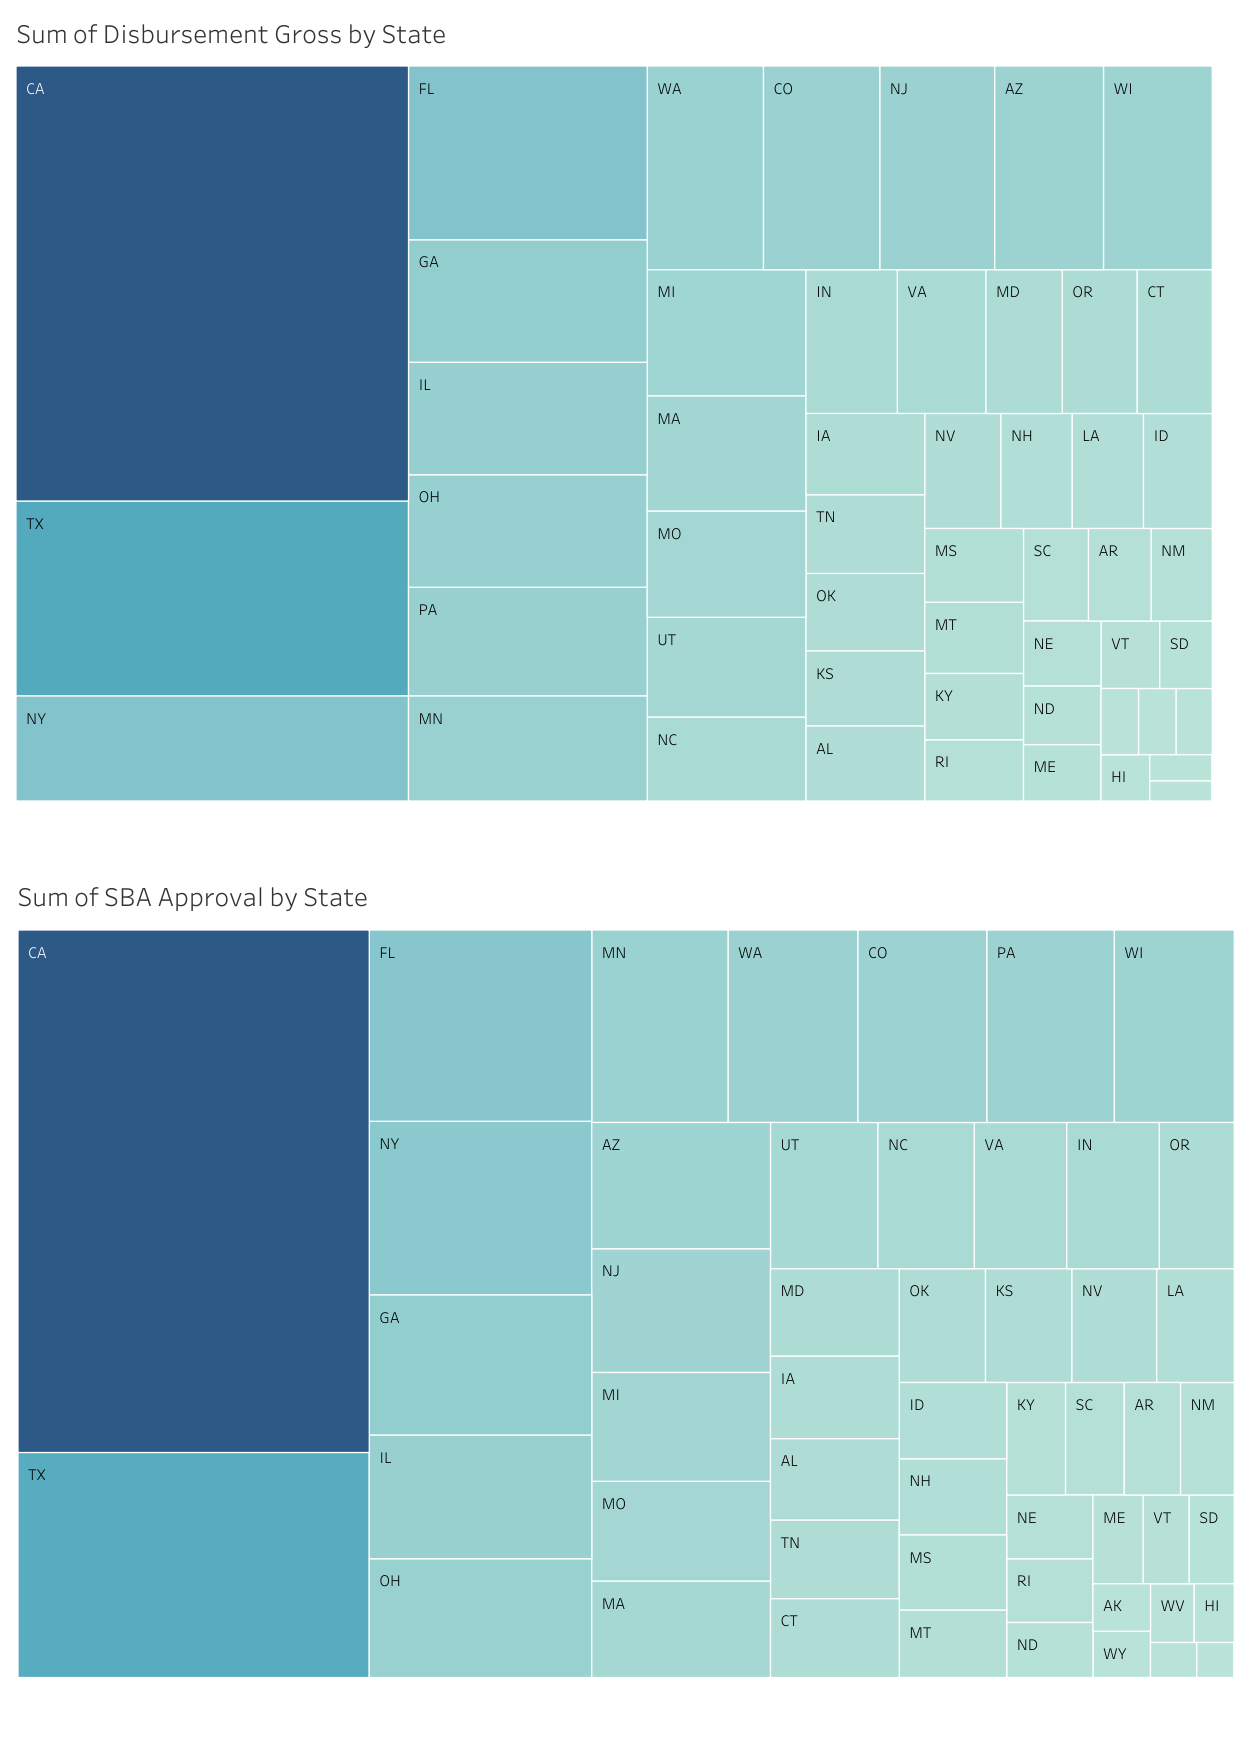

# 3. Multivariate Analysis

In [84]:
df.corr()

,LoanNr_ChkDgt,Zip,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,Recession,RealEstate,Portion
LoanNr_ChkDgt,1.000000,0.035010,-0.256893,0.155823,0.048351,-0.056649,0.014503,0.002920,0.091000,0.030187,0.115728,0.001138,-0.032607,0.129440,0.131694,-0.156834,0.125642,0.224955
Zip,0.035010,1.000000,0.035196,0.134592,0.040591,-0.020399,0.026143,0.019347,0.015892,-0.052655,0.095480,-0.000223,0.020974,0.103154,0.109101,0.026499,0.118602,0.147326
ApprovalFY,-0.256893,0.035196,1.000000,-0.189461,-0.026339,0.048028,0.010003,0.032154,-0.046119,0.039279,-0.026405,0.000524,0.027933,-0.052008,-0.045336,0.333259,-0.147738,-0.161571
Term,0.155823,0.134592,-0.189461,1.000000,0.120137,-0.034664,0.085145,0.028371,0.068425,0.025534,0.501343,0.003047,-0.029546,0.546792,0.563550,-0.044707,0.868768,0.495828
NoEmp,0.048351,0.040591,-0.026339,0.120137,1.000000,-0.108110,0.174108,0.441306,0.028255,-0.003511,0.275292,-0.000198,0.031614,0.275217,0.274475,-0.007571,0.126057,0.124058
NewExist,-0.056649,-0.020399,0.048028,-0.034664,-0.108110,1.000000,0.038748,-0.079587,0.139295,0.047051,-0.057956,0.001760,0.020639,-0.045481,-0.041548,0.040763,-0.073178,0.117108
CreateJob,0.014503,0.026143,0.010003,0.085145,0.174108,0.038748,1.000000,0.098120,0.049806,-0.007144,0.125471,-0.000092,0.029738,0.129136,0.143429,0.014657,0.098280,0.088630
RetainedJob,0.002920,0.019347,0.032154,0.028371,0.441306,-0.079587,0.098120,1.000000,0.008315,-0.026929,0.130861,-0.000543,0.025156,0.123143,0.110762,0.011195,0.026669,-0.008367
FranchiseCode,0.091000,0.015892,-0.046119,0.068425,0.028255,0.139295,0.049806,0.008315,1.000000,0.004688,0.092546,-0.000102,0.043739,0.106908,0.111979,-0.009128,0.029710,0.146031
UrbanRural,0.030187,-0.052655,0.039279,0.025534,-0.003511,0.047051,-0.007144,-0.026929,0.004688,1.000000,0.006729,0.001970,-0.010127,0.008454,0.014481,0.012636,0.016410,0.099724


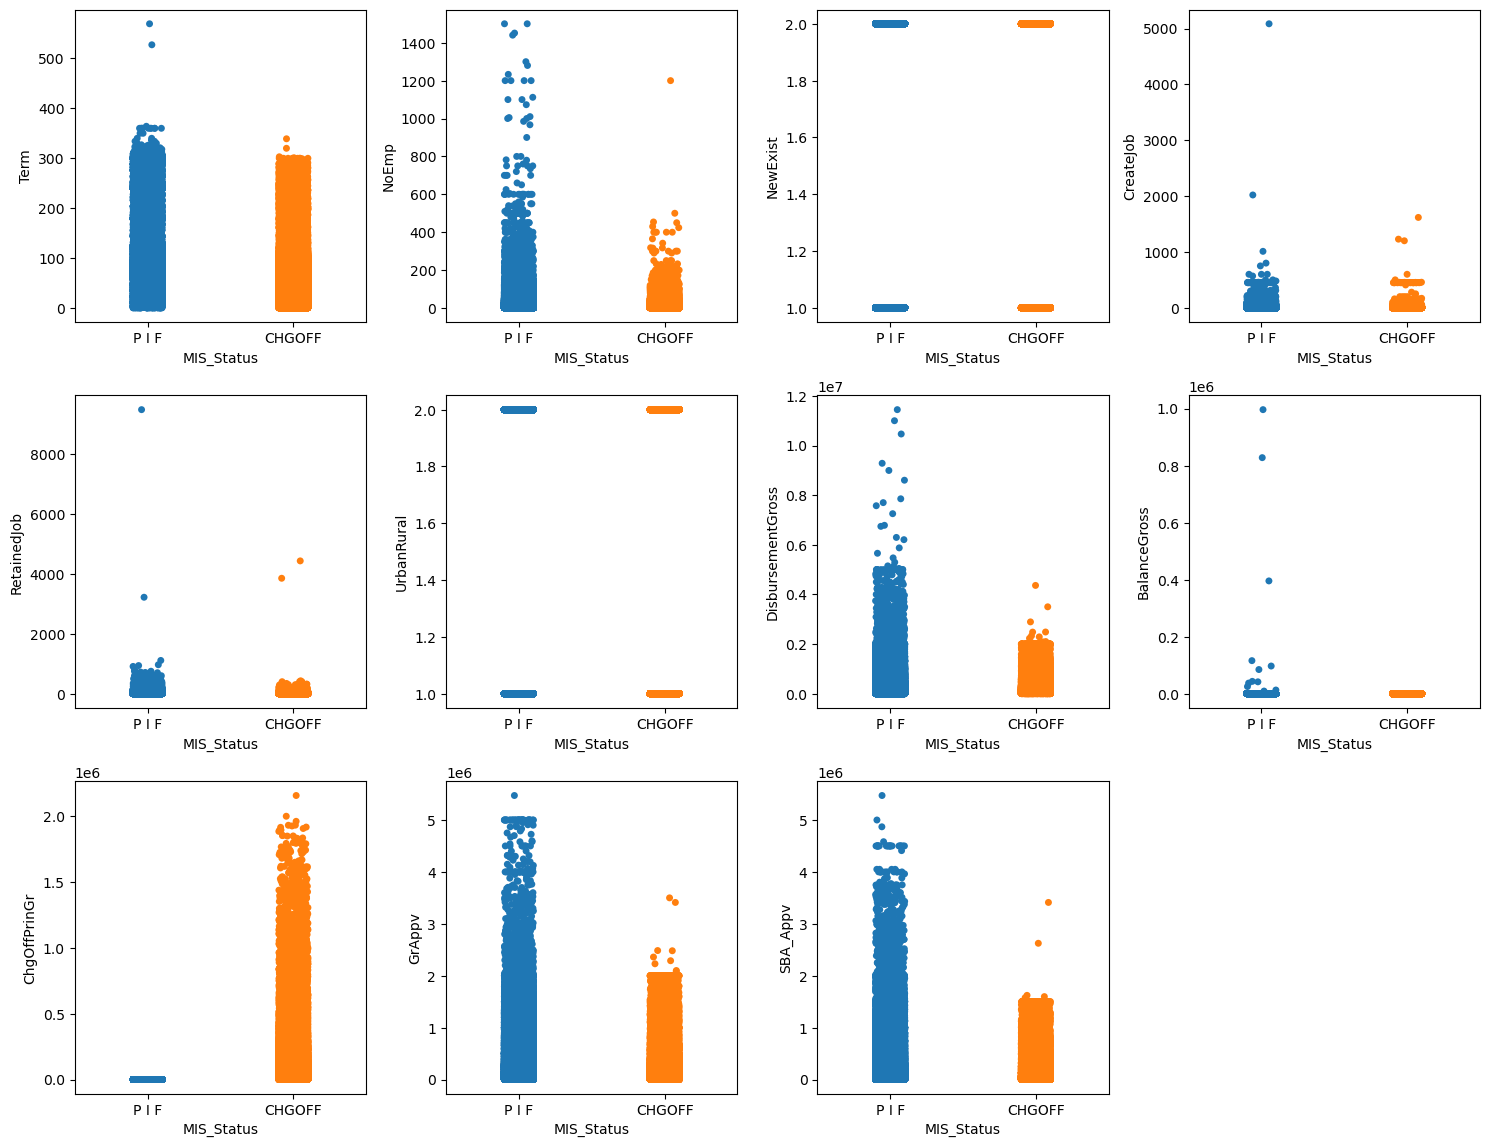

In [85]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(4, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='MIS_Status', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

In [86]:
# ubah values target menjadi numeric agar bisa dilihat korelasinya
df['MIS_Status'] = np.where(df['MIS_Status'] == 'P I F', 1, 0)

<AxesSubplot:>

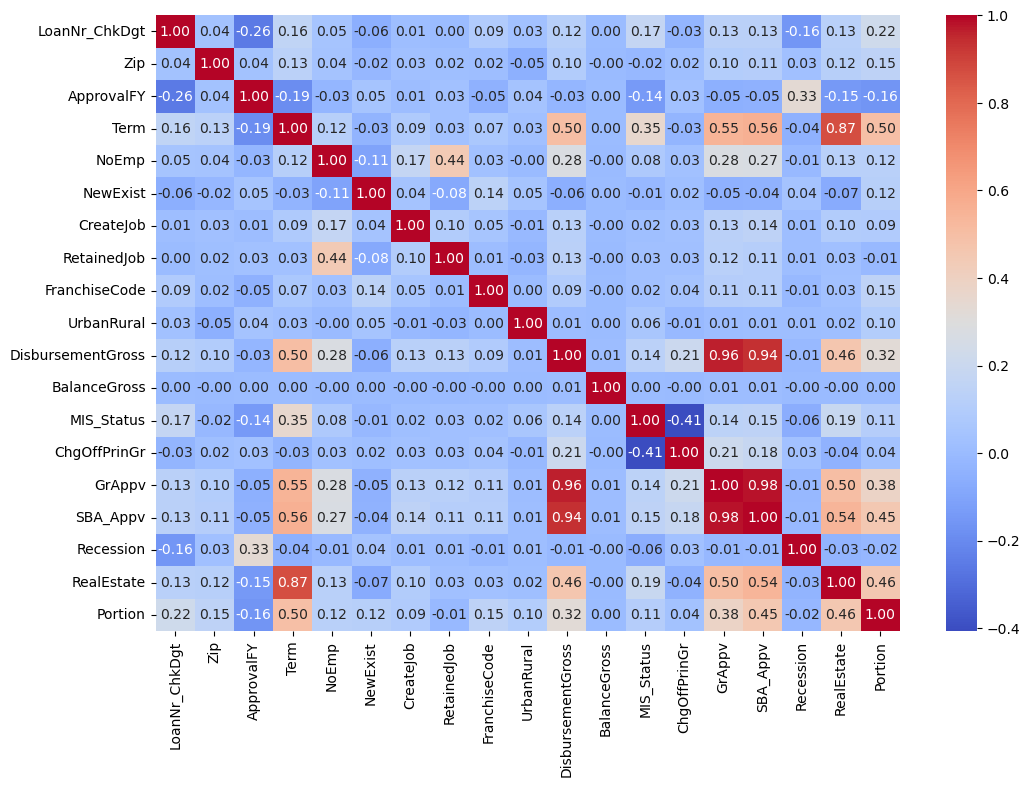

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')

**Keterangan** :
- Pada variabel **CreateJob** dan **RetainedJob**  terdapat adanya korelasi kuat yaitu sebesar 0.99 yang memiliki hubungan positif. Artinya jika CreateJob mengalami kenaikan maka RetainedJob akan mengalami kenaikan juga.

- Heatmap diatas juga terdapat korelasi yang lemah terhadap feature target **MIS_Status** dengan kolom **Term** yaitu sebesar 0.31

# 4. Bussiness Insight

- Dari data Term terlihat bahwa data cukup berimbang, tidak ada kecenderungan tertentu ke kondisi gagal bayar atau berhasil bayar
- Untuk perusahaan yang gagal bayar cenderung perusahaan yang memiliki jumlah karyawan sedikit
- Kebanyakan perusahaan yang gagal bayar adalah perusahaan dengan jangka waktu pinjaman yang pendek

# pada saat data preprocessing nanti kemungkinan kami menambahkan feature baru, yaitu antara lain:
- terdapat masa resesi terjadi pada bulan dec 2007 - jun 2009, sehingga membuat variabel baru "Recession". resesi = 1, other = 0
- Kepemilikan properti (tanah), Hal ini dikarenakan nilai dari properti tersebut seringkali cukup besar untuk menutupi jumlah pokok yang masih belum dibayar, sehingga mengurangi kemungkinan terjadinya gagal bayar. pinjaman yang didukung oleh properti biasanya memiliki durasi 20 tahun atau lebih (240 bulan) dan merupakan satu-satunya pinjaman yang diberikan untuk jangka waktu yang begitu lama, sedangkan pinjaman yang tidak didukung  oleh properti biasanya memiliki durasi kurang dari 20 tahun (<240 bulan).  Oleh karena itu, membuat variabel dummy "RealEstate," di mana "RealEstate" = 1 jika "Term" (≥ 240 bulan) dan "RealEstate" = 0 jika "Term" < 240 bulan.
- terdapat asumsi semakin besar jumlah yang dijamin semakin kecil resiko gagal bayar. membuat kolom "portion" untuk melihat rasio persentase antara, jumlah yang diberikan oleh bank (GrAPP) dan jumlah yang dijamin oleh SBA (SBA_Appv). (SBA_Appv/GrAPP)